# Empirical Runtime Analysis of Karatsuba
## Evan Stamm

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [1]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.0 kB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.2/15.8 MB 4.1 MB/s eta 0:00:04
    --------------------------------------- 0.4/15.8 MB 4.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/15.8 MB 6.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.5/15.8 MB 8.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.5/15.8 MB 8.2 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/15.8 MB 8.3 MB/s eta 0:00:02
   --------- ------------------------------ 3.8/15.8 MB 11.0 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/15.8 MB 11.5 MB/s eta 0:00:01
   ------------- -------------------------- 5.3/15.8 MB 12.0 MB/s eta 0:00:01
  

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

## Insertion Sort with Print Statements

In [3]:
#Evan Stamm Implementation of Karatsuba Algorithm

#Default input is a set of two 64 digit numbers
A = 3141592653589793238462643383279502884197169399375105820974944592
B = 2718281828459045235360287471352662497757247093699959574966967627

def karatsuba(inputA, inputB):
    #find # of digits (assuming inputs are the same size, positive ints)
    n = len(str(inputA))
    #base case, we invoke multiplication operator only on 1 digit numbers 
    if(n == 1):
        return (int(inputA) * int(inputB))
    middle = n // 2
    
    #Divide both input numbers into left and right parts
    A_left = inputA // 10**(middle)
    A_right = inputA % 10**(middle)

    B_left = inputB // 10**(middle)
    B_right = inputB % 10**(middle)
    
    #compute 
    left_prod = karatsuba(A_left, B_left)
    right_prod = karatsuba(A_right, B_right)
    sum_prod = karatsuba((A_left + A_right), (B_left + B_right))

    return (left_prod*(10**(2*middle)) + ((sum_prod - left_prod - right_prod)*(10**(middle))) + right_prod)

## Check for Correctness

In [5]:
#Check using defualt input (64 digit number)
print("Result using karatsuba:", karatsuba(A, B))
print("Result using python multiplication:", A*B)

Result using karatsuba: 8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184
Result using python multiplication: 8539734222673567065463550869546574495034888535765114961879601127067743044893204848617875072216249073013374895871952806582723184
30103073
30103073


## Plotting Run-Time Complexity

In [6]:
# Generate a random number, specifically with n digits
import random

def generate_random_input(n):
    low = 10**(n-1)
    high = 10**n-1
    int = random.randint(low, high)
    return int

## Test our random function

In [7]:
# Try different sizes of n, which should match number of digits
print(generate_random_input(1))
print(generate_random_input(2))
print(generate_random_input(100))

2
88
8901523110761292703374841264478510071588081193776307387801146196130852453318916369659084233389283225


In [17]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of digit sizes considered
start_array = 5
end_array = 200
increments = 5

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        val1 = generate_random_input(curr_size)           #Generate 2 random values of the same size
        val2 = generate_random_input(curr_size)
        start = time.time()                               # Record state time
        karatsuba(val1, val2)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(avg_time_taken[10])

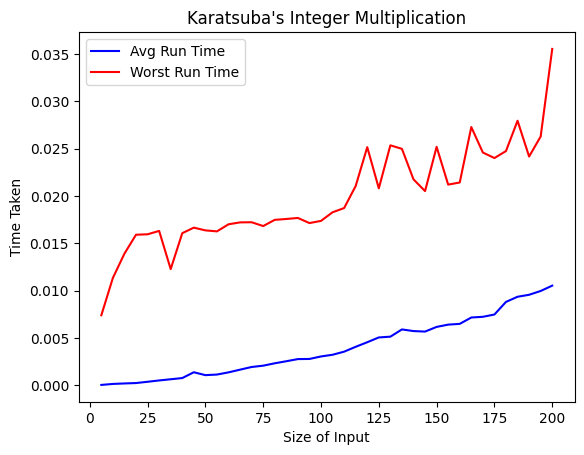

In [18]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Karatsuba's Integer Multiplication") 

# Add Axes Labels
plt.xlabel("Size of Input") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)